In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pygments import highlight
import seaborn as sns

# Read the CSV file
df = pd.read_csv(r"C:\Users\Surface Laptop 3\OneDrive\Documents\DataScience\data.csv")
print(df.head(1)) 

   customer_id  credit_score country  gender  age  tenure  balance  \
0     15634602           619  France  Female   42       2      0.0   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  


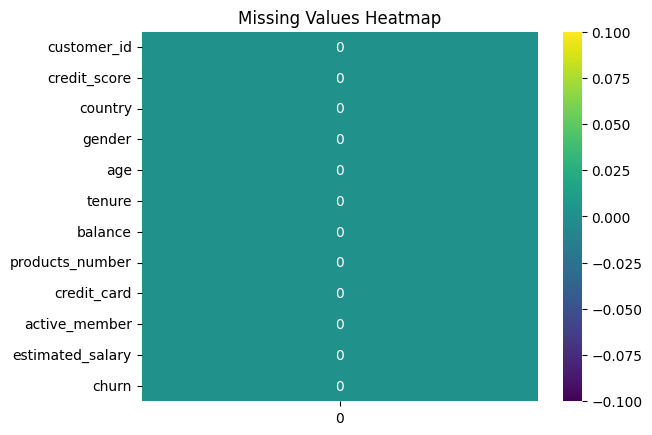

In [29]:
# Check for missing values
missing_values = df.isnull().sum() # 0 missing values in each column
sns.heatmap(missing_values.to_frame(), annot=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [30]:
duplicated_valus = df.duplicated().sum() # 0 duplicate rows
print("Duplicated values" , duplicated_valus)

Duplicated values 0


In [31]:
#Feature engineering example
avrage_salary = df["estimated_salary"].mean()
avrage_balance = df["balance"].mean()

df["IsHighValueCustomer"] = 0
df.loc[(df["estimated_salary"] > avrage_salary) & (df["balance"] > avrage_balance), "IsHighValueCustomer"] = 1
Hcustomer = df["IsHighValueCustomer"].value_counts() #2996 high value customers
print("High value customers: ", Hcustomer)


df["IsActiveWithBalance"] = 0
df.loc[(df["balance"] > 0) & (df["active_member"] == 1), "IsActiveWithBalance"] = 1
AWB=df["IsActiveWithBalance"].value_counts() # 3278 active customers with balance
print("Active customers with balance: ", AWB)

df["IsActiveWithoutBalance"] = 0
df.loc[(df["balance"] == 0) & (df["active_member"] == 1), "IsActiveWithoutBalance"] = 1
ANB=df["IsActiveWithoutBalance"].value_counts() # 1873 active without balance customers
print("Active customers without balance: ", ANB)

df["IsInactiveWithBalance"] = 0
df.loc[(df["balance"] > 0) & (df["active_member"] == 0), "IsInactiveWithBalance"] = 1
IAWB=df["IsInactiveWithBalance"].value_counts() #3105 inactive with balance customers
print("Iactive customers with balance: ", IAWB)

df["IsInactiveWithoutBalance"] = 0
df.loc[(df["balance"] == 0) & (df["active_member"] == 0), "IsInactiveWithoutBalance"] = 1
IANB=df["IsInactiveWithoutBalance"].value_counts() # 1744 inactive without balance customers
print("Inactive customers without balance: ", IANB)

min_age = df["age"].min() #18
max_age = df["age"].max() #92
bins = [min_age, 24, 45, 60, 75, max_age] 
labels = ["Young", "Adult", "Middle-Aged", "Senior", "elderly"]
df["AgeGroup"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)
agegroup = df["AgeGroup"].value_counts() #Adult / 7432  Middle-Aged / 1647  Young / 457  Senior / 419  elderly / 45 
print("Agegroups = ", agegroup)

High value customers:  IsHighValueCustomer
0    7004
1    2996
Name: count, dtype: int64
Active customers with balance:  IsActiveWithBalance
0    6722
1    3278
Name: count, dtype: int64
Active customers without balance:  IsActiveWithoutBalance
0    8127
1    1873
Name: count, dtype: int64
Iactive customers with balance:  IsInactiveWithBalance
0    6895
1    3105
Name: count, dtype: int64
Inactive customers without balance:  IsInactiveWithoutBalance
0    8256
1    1744
Name: count, dtype: int64
Agegroups =  AgeGroup
Adult          7432
Middle-Aged    1647
Young           457
Senior          419
elderly          45
Name: count, dtype: int64


In [32]:
df.to_csv("preproccessed_data.csv", index=False)

# Load the preprocessed data with new features
preproccess_df = pd.read_csv("preproccessed_data.csv")

In [33]:
#scaling on all numerical features except customer_id...
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = [ "age", "balance", "estimated_salary"]
preproccess_df[numerical_features] = scaler.fit_transform(preproccess_df[numerical_features]) 
preproccess_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,IsHighValueCustomer,IsActiveWithBalance,IsActiveWithoutBalance,IsInactiveWithBalance,IsInactiveWithoutBalance
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,2.316369e-16,5.012800,-6.536993e-17,1.530200,0.70550,0.515100,-2.522427e-17,0.203700,0.299600,0.327800,0.187300,0.310500,0.174400
std,7.193619e+04,96.653299,1.000050e+00,2.892174,1.000050e+00,0.581654,0.45584,0.499797,1.000050e+00,0.402769,0.458106,0.469435,0.390172,0.462721,0.379472
min,1.556570e+07,350.000000,-1.994969e+00,0.000000,-1.225848e+00,1.000000,0.00000,0.000000,-1.740268e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,-6.600185e-01,3.000000,-1.225848e+00,1.000000,0.00000,0.000000,-8.535935e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,-1.832505e-01,5.000000,3.319639e-01,1.000000,1.00000,1.000000,1.802807e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.575323e+07,718.000000,4.842246e-01,7.000000,8.199205e-01,2.000000,1.00000,1.000000,8.572431e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.581569e+07,850.000000,5.061197e+00,10.000000,2.795323e+00,4.000000,1.00000,1.000000,1.737200e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
#one hot encoding for age group
agegroup_dummies = pd.get_dummies(preproccess_df["AgeGroup"], prefix="AgeGroup")
preproccess_df = pd.concat([preproccess_df, agegroup_dummies], axis=1)
preproccess_df = preproccess_df.drop("AgeGroup", axis=1)

preproccess_df = preproccess_df.drop("customer_id", axis=1) #dropping customer id as it is not needed for modeling

preproccess_df.to_csv("final_preproccessed_data.csv", index=False)

final_data = pd.read_csv("final_preproccessed_data.csv")

print((final_data["AgeGroup_Young"].value_counts())) # 457
print((final_data["AgeGroup_Middle-Aged"].value_counts())) # 1647
print((final_data["AgeGroup_Senior"].value_counts())) # 419
print((final_data["AgeGroup_elderly"].value_counts())) # 45
print((final_data["AgeGroup_Adult"].value_counts())) # 7432

AgeGroup_Young
False    9543
True      457
Name: count, dtype: int64
AgeGroup_Middle-Aged
False    8353
True     1647
Name: count, dtype: int64
AgeGroup_Senior
False    9581
True      419
Name: count, dtype: int64
AgeGroup_elderly
False    9955
True       45
Name: count, dtype: int64
AgeGroup_Adult
True     7432
False    2568
Name: count, dtype: int64


In [36]:
#categorial to numerical encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
catagorical_features = ["gender"]
preproccess_df["gender"]= label_encoder.fit_transform(preproccess_df[catagorical_features])

preproccess_df["country_france"] = 0
preproccess_df.loc[preproccess_df["country"] == "France", "country_france"] = 1

preproccess_df["country_germany"] = 0
preproccess_df.loc[preproccess_df["country"] == "Germany", "country_germany"] = 1

preproccess_df["country_spain"] = 0
preproccess_df.loc[preproccess_df["country"] == "Spain", "country_spain"] = 1

preproccess_df=preproccess_df.drop("country", axis =1)
preproccess_df.tail()

C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,...,IsInactiveWithBalance,IsInactiveWithoutBalance,AgeGroup_Adult,AgeGroup_Middle-Aged,AgeGroup_Senior,AgeGroup_Young,AgeGroup_elderly,country_france,country_germany,country_spain
9995,771,1,0.007457,5,-1.225848,2,1,0,-0.066419,0,...,0,1,True,False,False,False,False,1,0,0
9996,516,1,-0.373958,10,-0.306379,1,1,1,0.027988,0,...,0,0,True,False,False,False,False,1,0,0
9997,709,0,-0.278604,7,-1.225848,1,0,1,-1.008643,1,...,0,0,True,False,False,False,False,1,0,0
9998,772,1,0.293517,3,-0.022608,2,1,0,-0.125231,1,...,1,0,True,False,False,False,False,0,1,0
9999,792,0,-1.041433,4,0.859965,1,1,0,-1.076370,0,...,1,0,True,False,False,False,False,1,0,0
